Import_Libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [54]:
#read original image 
img=cv2.imread("D:\Graduation _Project\c120.png")

In [55]:
#convert to gray scale image
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#save gray_img
cv2.imwrite('gray_img.png',gray_img)

True

Diplay Color & Gray Images

In [56]:
#Display color_image inside a window
cv2.imshow('color image',img)
#Display gray_image inside a window
cv2.imshow('grayscale image',gray_img)
# Waits for a keystroke
cv2.waitKey(0)
# Destroys all the windows created
cv2.destroyAllWindows()

Apply Median Filter

In [57]:
# apply median filter for smoothning
median_img=cv2.medianBlur(gray_img,5)
#save median_img
cv2.imwrite("median_img.png",median_img)

True

Diplay_Median_Image

In [58]:
#show median_img
cv2.imshow('grayscale image',median_img)
# Waits for a keystroke
cv2.waitKey(0)
# Destroys all the windows created
cv2.destroyAllWindows()

Apply Gaussian Filter

In [59]:
#apply gaussian filter for smoothning
gaussian_img=cv2.GaussianBlur(gray_img,(7,7),0)
#save gaussian_img
cv2.imwrite("gaussian_img.png",gaussian_img)

True

Display_Gaussian_image

In [60]:
#show gaussian_img
cv2.imshow('grayscale image',gaussian_img)
# Waits for a keystroke
cv2.waitKey(0)
# Destroys all the windows created
cv2.destroyAllWindows()

Piecewise-Linear Transformation Functions

In [61]:
# contrast stretching
# Find Minimum & Maximum itensities
min_itensity = np.amin(gray_img)
max_itensity = np.amax(gray_img)
print('Minimum itensity value in gray_image {}'.format(min_itensity))
print('Maximum itensity value in gray_image {}'.format(max_itensity))


Minimum itensity value in gray_image 53
Maximum itensity value in gray_image 245


In [62]:
# Define parameters
r1=min_itensity
r2=max_itensity
s1=0
s2=255
#Function to map each intensity level to output intensity level
def pixel_val(pixel,r1,s1,r2,s2):
    if(pixel >= 0 and pixel <= r1):
        return (s1 / r1)*pixel
    elif(pixel > r1 and pixel <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pixel - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pixel - r2) + s2
    
 #To vectorize a function so it can be called on every element of a numpy array 
pixel_val_vectorized=np.vectorize(pixel_val)



Apply contrast stretch on gray_img , median_img and gaussian_img

In [63]:
#Call Function pixel_val_vectorized
contrast_gray_img=pixel_val_vectorized(gray_img,r1,s1,r2,s2)
contrast_median_img=pixel_val_vectorized(median_img,r1,s1,r2,s2)
contrast_gaussian_img=pixel_val_vectorized(gaussian_img,r1,s1,r2,s2)

#Save contrast_images
cv2.imwrite("contrast_gray_img.png",contrast_gray_img)
cv2.imwrite("contrast_median_img.png",contrast_median_img)
cv2.imwrite("contrast_gaussian_img.png",contrast_gaussian_img)

True

 Feature Extraction 

In [64]:
#Edge detection using canny edge detector
#Canny edge detection high threshold 
canny_gray_img=cv2.Canny(gray_img,100,200)
canny_median_img=cv2.Canny(median_img,100,200)
canny_gaussian_img=cv2.Canny(gaussian_img,100,200)

In [65]:
#save canny edge detecting images
cv2.imwrite("canny_gray_img.png",canny_gray_img)
cv2.imwrite("canny_median_img.png",canny_median_img)
cv2.imwrite("canny_gaussian_img.png",canny_gaussian_img)

True

Text(0.5, 1.0, 'canny_gaussian_img')

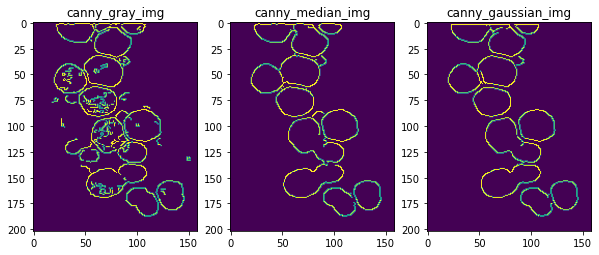

In [66]:
#display both original and canny edge detecting images
# create figure
fig=plt.figure(figsize=(10,5))
rows=1
columns=3

# Add subplots & show canny edge detecting images

fig.add_subplot(rows,columns,1)
plt.imshow(canny_gray_img)
plt.title("canny_gray_img")

fig.add_subplot(rows,columns,2)
plt.imshow(canny_median_img)
plt.title("canny_median_img")

fig.add_subplot(rows,columns,3)
plt.imshow(canny_gaussian_img)
plt.title("canny_gaussian_img")